In [1]:
import pandas as pd
import scipy.sparse as sp
import numpy as np
import json
import torch
from tqdm import tqdm

In [3]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['text.usetex'] = True

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

In [23]:
df_list = []
for noise in [0,5,8]:
    a = pd.read_csv('./saves/ml10/sim_abs_diff_neg1_noise{}-nodiff.csv'.format(noise))
    #a = pd.read_csv('./saves/yelp/sim_abs_diff_neg1_noise{}-nodiff.csv'.format(noise))
    a['Noise']=noise/10
    df_list.append(a)
df = pd.concat(df_list)

In [24]:
df

,HR@1,HR@5,HR@10,HR@15,HR@20,Steps,HR@1_CI,HR@5_CI,HR@10_CI,HR@15_CI,HR@20_CI,Noise
0,0.027973,0.098274,0.151671,0.189857,0.219962,0,0.000527,0.000951,0.001146,0.001253,0.001324,0.0
1,0.060344,0.193470,0.281176,0.338526,0.381848,1,0.000761,0.001262,0.001437,0.001512,0.001553,0.0
2,0.078323,0.241913,0.345027,0.408864,0.455752,2,0.000859,0.001369,0.001519,0.001571,0.001592,0.0
3,0.098197,0.280724,0.389405,0.455470,0.503121,3,0.000951,0.001436,0.001558,0.001592,0.001598,0.0
4,0.110718,0.305097,0.417716,0.484840,0.533312,4,0.001003,0.001472,0.001576,0.001597,0.001594,0.0
5,0.119898,0.321938,0.435125,0.502505,0.550860,5,0.001038,0.001493,0.001584,0.001598,0.001590,0.0
0,0.027973,0.098274,0.151671,0.189857,0.219962,0,0.000527,0.000951,0.001146,0.001253,0.001324,0.5
1,0.050448,0.164314,0.241177,0.292819,0.331996,1,0.000699,0.001184,0.001367,0.001454,0.001505,0.5
2,0.064077,0.202467,0.292999,0.351453,0.394693,2,0.000783,0.001284,0.001455,0.001526,0.001562,0.5
3,0.077674,0.231323,0.329305,0.391189,0.436455,3,0.000855,0.001348,0.001502,0.001560,0.001585,0.5


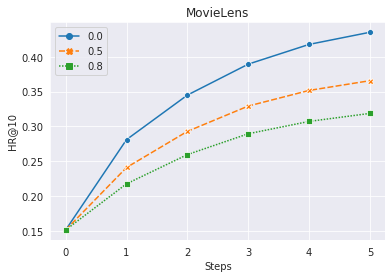

In [28]:
metric = "HR@10"
df_ = df.pivot("Steps", "Noise", metric)

plot = sns.lineplot(data=df_, markers=True)
plot.set_title('MovieLens')
plot.set_ylabel(metric)
plot.figure.savefig("./saves/ml10/"+metric+'1.pdf')

In [30]:
df_list = []
for prec in [0,1,10,100]:
    a = pd.read_csv('./saves/yelp/sim_abs_diff_neg{}_noise0-nodiff.csv'.format(prec))
    a['prec']=prec
    df_list.append(a)
df = pd.concat(df_list)
df

,HR@1,HR@5,HR@10,HR@15,HR@20,Steps,prec
0,0.000762,0.003049,0.005718,0.007700,0.010292,0,0
1,0.001449,0.006480,0.013265,0.018068,0.024320,1,0
2,0.002363,0.012198,0.018983,0.023786,0.029732,2,0
3,0.004193,0.013723,0.021651,0.027217,0.035221,3,0
4,0.004498,0.015247,0.025006,0.032858,0.042388,4,0
5,0.005565,0.019135,0.030571,0.041320,0.051994,5,0
0,0.000762,0.003049,0.005718,0.007700,0.010292,0,1
1,0.001449,0.006633,0.013189,0.017992,0.024320,1,1
2,0.002058,0.012350,0.019212,0.024320,0.030190,2,1
3,0.003202,0.014180,0.022795,0.028589,0.036136,3,1


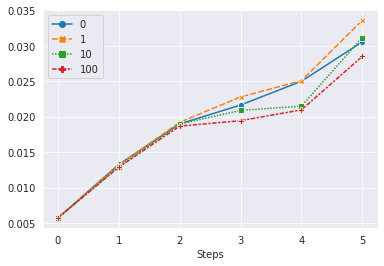

In [33]:
a = df.pivot("Steps", "prec", "HR@10")

ax = sns.lineplot(data=a, markers=True)

In [4]:
metric = "HR@10"
df_list = []
for f in ['fold1','fold2','fold3','fold4','fold0']:
    temp = []
    for noise in [0,3,5]:
        #f = 'fold1'
        a = pd.read_csv('./saves/ml10/' + f + '-sim_abs_diff_neg1_noise{}.csv'.format(noise))
        #a = pd.read_csv('./saves/yelp/sim_abs_diff_neg1_noise{}-nodiff.csv'.format(noise))
        a['Noise']=noise/10
        a['fold'] = f
        temp.append(a)
    a = pd.concat(temp)
    a = a.pivot("Steps", "Noise", metric)
    df_list.append(a)
df = pd.concat(df_list)

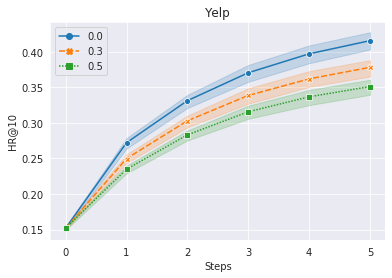

In [5]:


plot = sns.lineplot(data=df, markers=True)
plot.set_title('Yelp')
plot.set_ylabel(metric)
plot.figure.savefig("./saves/ml10/"+metric+'1111.pdf')

In [14]:

df_ = df.pivot("Steps", "Noise", metric)

plot = sns.lineplot(data=df_, markers=True)
plot.set_title('MovieLens')
plot.set_ylabel(metric)
plot.figure.savefig("./saves/yelp/"+metric+'1111.pdf')

ValueError: Index contains duplicate entries, cannot reshape

In [4]:
metric = "HR@10"
df_list = []
df_step1 = 0
for f in ['fold0']:
    temp = []
    for noise in [0,3,5]:
        #f = 'fold1'
        a = pd.read_csv('./saves/ml10/' + f + '-sim_abs_diff_neg1_noise{}.csv'.format(noise))
        #a = pd.read_csv('./saves/yelp/sim_abs_diff_neg1_noise{}-nodiff.csv'.format(noise))
        if noise == 0:
            a['Noise'] = 'Noiseless'    
        else:
            a['Noise']='0.{} Noise'.format(noise)
        temp.append(a)
    
    a = pd.concat(temp)
    a = a.pivot("Steps", "Noise", metric)
    df_list.append(a)
df = pd.concat(df_list)

In [5]:
df

Noise,0.3 Noise,0.5 Noise,Noiseless
Steps,,,
0,0.151671,0.151671,0.151671
1,0.257834,0.241177,0.281176
2,0.314887,0.292999,0.345027
3,0.354588,0.329305,0.389405
4,0.379817,0.351700,0.417716
5,0.395214,0.365691,0.435133


In [6]:
temp = pd.read_csv('./saves/ml10/hyper_parameters4sec_zeroOut_HR.csv')
temp['Steps'] = list(range(6))
df_list = []
df2min = 0
for m in [metric, metric+'_neg']:
    a = pd.DataFrame()
    a['Steps'] = temp['Steps']
    if 'neg' in m:
        a['type']='Neg only'
    else:
        print("ads")
        a['type']='Neg&Pos'
    a[metric] = temp[m]
    df_list.append(a)
    df2min = a[metric][0]

df2 = pd.concat(df_list)
df2 = df2.pivot("Steps", "type", metric)
df2

ads


type,Neg only,Neg&Pos
Steps,,
0,0.057425,0.057425
1,0.065571,0.064707
2,0.065643,0.065396
3,0.065646,0.065154
4,0.065646,0.065045
5,0.065646,0.065603


In [7]:
#df = pd.concat([a,df],axis=1)

In [8]:
c1 = sns.color_palette()[0]
c2 = sns.color_palette()[1]


In [9]:
sns.set(font_scale=1.3)  # crazy big
fig, ax1 = plt.subplots()
plt.rc('axes', axisbelow=True)


ax1.set(ylim=(0.055, 0.5))

plot = sns.lineplot(data=df, palette=[c1,c1,c1], hue='noise',hue_order = ['Noiseless','0.3 Noise', '0.5 Noise'], dashes=[(3,1.5), (3, 6),(3, 0)], style='noise', markers=True)
ax1.set_ylabel("BK-VAE",color=c1)
ax2 = plt.twinx()

ax2.set(ylim=(0.055, 0.1))

ax2.set_ylabel("CE-VAE",color=c2)
sns.lineplot(data=df2, palette=[c2,c2], markers=True, ax=ax2)
ax2.legend(frameon=True, loc='center right',fontsize=15)
ax2.grid(None)
ax1.legend(frameon=True, loc='upper left',fontsize=15)
plot.set_title('MovieLens: '+metric)
ax1.xaxis.set_major_locator(plt.MaxNLocator(6))
ax2.tick_params(axis='both', which='both', length=0)
ax1.tick_params(axis='both', which='both', length=0)
plot.figure.savefig("./saves/ml10/"+metric+'full.pdf',bbox_inches='tight')

RuntimeError: latex was not able to process the following string:
b'Neg&Pos'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/hojin/.cache/matplotlib/tex.cache/c6094bd2b49c1e34af63c2d75f4bb3ec.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/utf8.def
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/omsenc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.dfu)))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

)
No file c6094bd2b49c1e34af63c2d75f4bb3ec.aux.
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Misplaced alignment tab character &.
l.14 ...tsize{15.000000}{18.750000}{\sffamily Neg&
                                                  Pos}
No pages of output.
Transcript written on c6094bd2b49c1e34af63c2d75f4bb3ec.log.




In [ ]:

#ax1.set(ylim=(0.055, 0.5))

#ml hr5
#ax1.set(ylim=(0.045, 0.35))
#ax2.set(ylim=(0.045, 0.07))

#yelp hr10
#ax2.set(ylim=(0.002, 0.004))
#ax1.set(ylim=(0.002, 0.031))

#yelp hr5
#ax1.set(ylim=(0.0012, 0.023))
#ax2.set(ylim=(0.0012, 0.003))

In [ ]:
import matplotlib.pyplot as plt
sns.lineplot(data=df.column1, color="g")
ax2 = plt.twinx()
sns.lineplot(data=df.column2, color="b", ax=ax2)

In [16]:
metric = "HR@10"
df_list = []
df_step1 = 0
for f in ['fold0']:
    temp = []
    for noise in [0]:
        #f = 'fold1'
        a = pd.read_csv('./saves/yelp/' + f + '-sim_abs_diff_neg1_noise{}.csv'.format(noise))
        #a = pd.read_csv('./saves/yelp/sim_abs_diff_neg1_noise{}-nodiff.csv'.format(noise))
        if noise == 0:
            a['Noise'] = 'BK-VAE'    
        else:
            a['Noise']='0.{} Noise'.format(noise)
        temp.append(a)
    
    a = pd.concat(temp)
    a = a.pivot("Steps", "Noise", metric)
    df_list.append(a)
df = pd.concat(df_list)

In [21]:
temp = pd.read_csv('./saves/yelp/hyper_parameters5_zeroOut_HR.csv')
temp['Steps'] = list(range(6))
df_list = []
df2min = 0
for m in [metric]:
    a = pd.DataFrame()
    a['Steps'] = temp['Steps']
    if 'neg' in m:
        a['type']='Neg only'
    else:
        print("ads")
        a['type']='CE-VAE'
    a[metric] = temp[m]
    df_list.append(a)
    df2min = a[metric][0]

df2 = pd.concat(df_list)
df2 = df2.pivot("Steps", "type", metric)
df2

ads


type,CE-VAE
Steps,
0,0.002058
1,0.002211
2,0.002287
3,0.002745
4,0.002821
5,0.002897


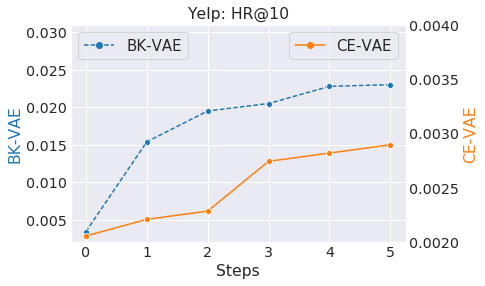

In [24]:
sns.set(font_scale=1.3)  # crazy big
fig, ax1 = plt.subplots()
plt.rc('axes', axisbelow=True)

#ax2.set(ylim=(0.002, 0.004))
ax1.set(ylim=(0.002, 0.031))
#ax1.set(ylim=(0.055, 0.5))

plot = sns.lineplot(data=df, palette=[c1], hue='noise',hue_order = ['BK-VAE'], dashes=[(3,1.5)], style='noise', markers=True)
ax1.set_ylabel("BK-VAE",color=c1)
ax2 = plt.twinx()

ax2.set(ylim=(0.002, 0.004))

ax2.set_ylabel("CE-VAE",color=c2)
sns.lineplot(data=df2, palette=[c2], markers=True, ax=ax2)
ax2.legend(frameon=True, loc='upper right',fontsize=15)
ax2.grid(None)
ax1.legend(frameon=True, loc='upper left',fontsize=15)
plot.set_title('Yelp: '+metric)
ax1.xaxis.set_major_locator(plt.MaxNLocator(6))
ax2.tick_params(axis='both', which='both', length=0)
ax1.tick_params(axis='both', which='both', length=0)
plot.figure.savefig("./saves/yelp/"+metric+'full.png',bbox_inches='tight')